Task description:

(1) Implemetation of the k-nearest neighbor (k-NN) algorithm and 

(2) Use the k-NN and decision tree for classification based on MNIST dataset available at http://yann.lecun.com/exdb/mnist/. 



### k-Nearest Neighbors

Using np.argsort along multiple axes to find the nearest neighbors of each point in a dataset. To demonstrate that I will generate random 10 points on the two-dimensional plane.

In [1]:
import numpy as np
rand = np.random.RandomState(3)
X = rand.rand(10, 2)

Draw the scatter plot of points

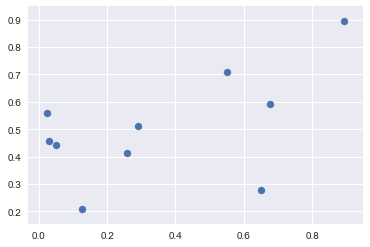

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.scatter(X[:, 0], X[:, 1], s=50);

Then calculate the distance between each pair of points. Using the numpy's broadcasting and aggregation to calculate the matrix of square distance.

In [3]:
dist_sq = np.sum((X[:, np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

Now I got the square-distance matrix, use np.argsort to sort along each row, the leftest colums are the indices of the nearest neighbors

In [4]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 7 1 2 9 6 8 4 5 3]
 [1 9 4 5 8 0 3 7 6 2]
 [2 7 0 6 1 9 8 4 5 3]
 [3 4 9 5 1 8 6 0 7 2]
 [4 5 8 9 3 1 0 6 7 2]
 [5 4 8 9 1 3 0 6 7 2]
 [6 7 9 1 0 3 4 5 2 8]
 [7 0 6 2 1 9 4 8 5 3]
 [8 5 4 1 9 3 0 7 6 2]
 [9 1 4 5 3 8 6 0 7 2]]


To simply get the nearest k neighbors, partition each row so that the smallest k + 1 squared distance come first, use np.argpartition

In [5]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

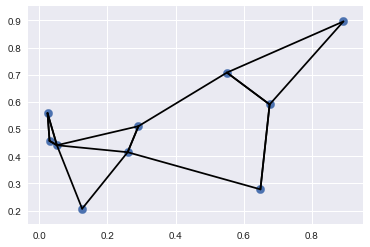

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=70)
for i in range(X.shape[0]):
    for j in nearest_partition[i, : K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

### k-NN & Decision Tree

Take adventage of ``tensorflow`` to load data

In [8]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X_train = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y_train = mnist.train.labels

X_test = np.vstack([img.reshape(-1,) for img in mnist.test.images])
y_test = mnist.test.labels

del mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Use k-NN to classify

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9677

The code cell above took me 20 mins to run, with fan buzzing fiercely.
The confusion matrix is below(The diagnol is a little ambiguous, but that is not a pivotal problem).

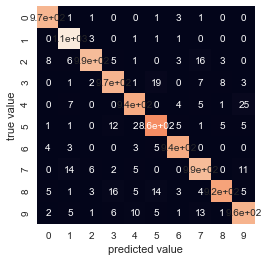

In [10]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Use decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_model = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8742

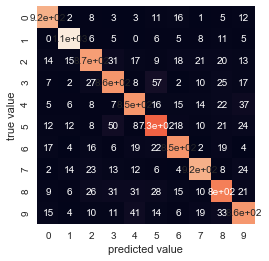

In [12]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');